<h1 'red' text:centre>Project_fake_detectation</h1>

In [27]:
from tensorflow.keras.layers import Bidirectional,LSTM,Embedding,TextVectorization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as ad
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding,Flatten

### loading data

In [13]:
fake = ad.read_csv("Fake.csv")
true = ad.read_csv("True.csv")
print(fake.head(10))
print(true.head(10))

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

#### adding labels

In [14]:
fake['label'] = 1
true['label'] = 0
fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


#### Create dataset

In [15]:
df = ad.concat([true,fake])
df = df.sort_index()
df = df.reset_index(drop=True)
print(df['label'].value_counts())
df.info()

1    23481
0    21417
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Data Visualisation

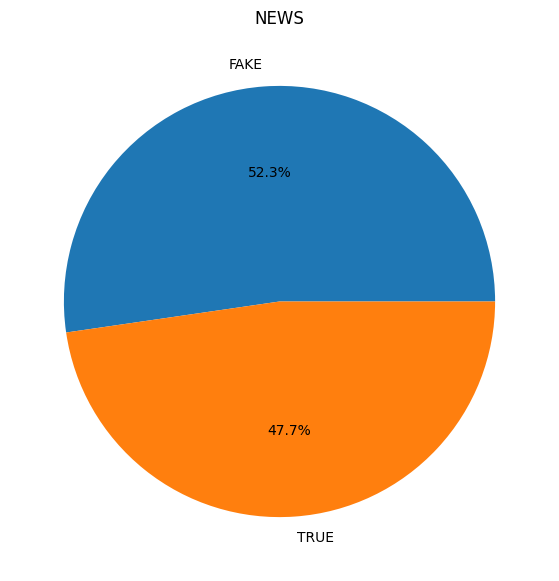

In [16]:
x = df[['label']].value_counts()


label = ['FAKE','TRUE']
fig = plt.figure(figsize =(10, 7))
plt.pie(x, labels = label,autopct='%1.1f%%')
plt.title("NEWS")
# show plot
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'politicsNews'),
  Text(1, 0, 'News'),
  Text(2, 0, 'politics'),
  Text(3, 0, 'worldnews'),
  Text(4, 0, 'Government News'),
  Text(5, 0, 'left-news'),
  Text(6, 0, 'US_News'),
  Text(7, 0, 'Middle-east')])

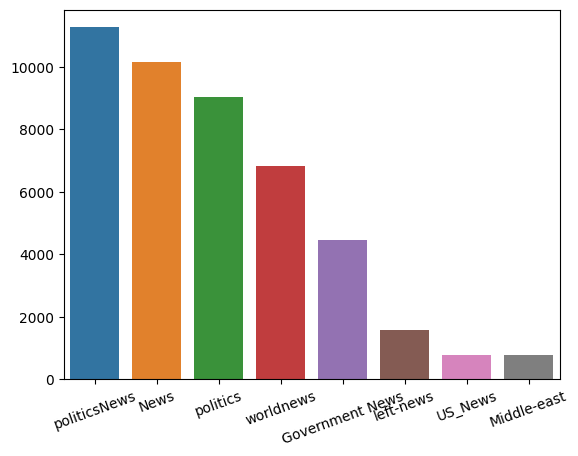

In [18]:
x = df['subject'].value_counts().to_list()
sns.barplot(x=df['subject'].unique(),y =x)
plt.xticks(rotation=20)

In [19]:
X_text = df['text']
Y = df['label']

In [20]:
tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token="oov",
    analyzer=None)
tokenizer.fit_on_texts(list(X_text))

In [21]:
sequences = tokenizer.texts_to_sequences(X_text)
padded = pad_sequences(sequences,maxlen=120, truncating='post')
padded

array([[ 108,   68,    2, ...,  509,  609,   99],
       [  71,   16,   83, ...,    6,  111,    2],
       [  73,  273,  233, ...,  199, 2475,  570],
       ...,
       [2385, 4379, 1014, ...,    8,   27,   64],
       [1014,  755, 1006, ...,   12,  101, 3514],
       [1014,  755, 1006, ..., 2182,    6,   47]])

In [22]:
x,x_test,y,y_test = train_test_split(padded,Y,test_size=0.2,random_state=0)
x_test

array([[  27,  300, 5558, ...,  224,   13,   15],
       [   0,    0,    0, ...,    7,   20, 3074],
       [  61,   35,  373, ..., 1070,  407,   12],
       ...,
       [ 108,   68,   95, ...,   51,   40, 7273],
       [ 108,   68,    7, ...,    2,   38,    9],
       [   0,    0,    0, ...,    2, 1547, 7101]])

In [23]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_voc = len(tokenizer.word_index) + 1
x_voc

138023

In [28]:
model = Sequential()
model.add(Embedding(x_voc,40, input_length=120))
model.add(Bidirectional(LSTM(10, return_sequences=True)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 40)           5520920   
                                                                 
 bidirectional_1 (Bidirectio  (None, 120, 20)          4080      
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 32)                76832     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                      

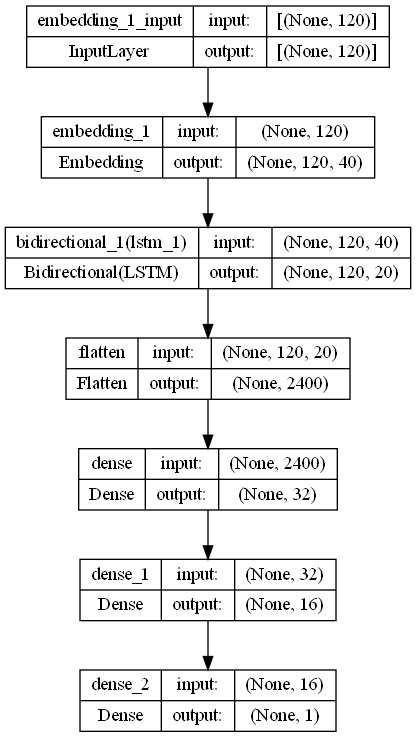

In [29]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, show_shapes=True,show_layer_names=True)

In [34]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')]



In [35]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=METRICS)

In [36]:
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/5
898/898 [==============================] - 33s 34ms/step - loss: 5.0962e-04 - accuracy: 1.0000 - precision: 0.9999 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9994 - val_precision: 0.9995 - val_recall: 0.9995 - val_auc: 0.9994
Epoch 2/5
898/898 [==============================] - 32s 35ms/step - loss: 4.7290e-04 - accuracy: 1.0000 - precision: 0.9999 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9994 - val_precision: 0.9995 - val_recall: 0.9995 - val_auc: 0.9994
Epoch 3/5
898/898 [==============================] - 39s 43ms/step - loss: 4.4282e-04 - accuracy: 1.0000 - precision: 0.9999 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9994 - val_precision: 0.9997 - val_recall: 0.9992 - val_auc: 0.9996
Epoch 4/5
898/898 [==============================] - 40s 45ms/step - loss: 0.0010 - accuracy: 0.9998 - precision: 0.9997 - recall: 0.9998 - auc: 0.9999 - val_loss: 0.0401 - val_accuracy: 0.9985 - val_precision: 0.9997

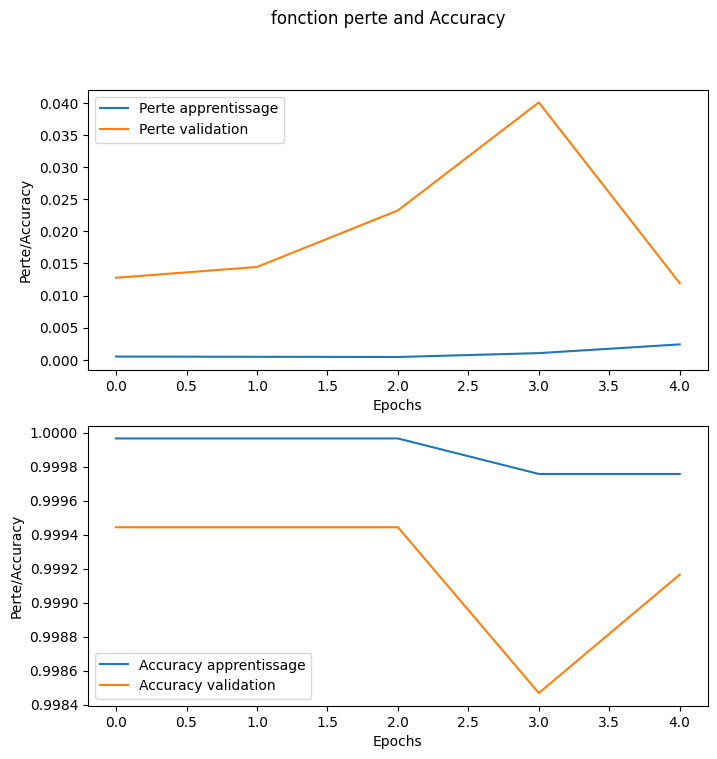

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 8))
plt.suptitle("fonction perte and Accuracy") 
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 5), history.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 5), history.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte/Accuracy")
plt.legend() 
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, 5), history.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 5), history.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Perte/Accuracy")
plt.legend()


In [39]:
score = model.evaluate(x_test,y_test,verbose = 0)
print(score[0:])

[0.015025991015136242, 0.9985523223876953, 0.9978804588317871, 0.9993631839752197, 0.9988598227500916]


In [40]:
text = "In October a story claimed that tens of thousands of fraudulent ballots had been found in a warehouse in Ohio. The ballots had supposedly been cast for Hillary Clinton and were found inside sealed ballot boxes that would be counted alongside real election ballot boxes."

In [41]:
tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token="oov",
    analyzer=None)
tokenizer.fit_on_texts(text)

In [42]:
sequences = tokenizer.texts_to_sequences(text)
padded = pad_sequences(sequences,maxlen=120, truncating='post')
padded

array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  7],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  8],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [48]:
model.predict_prob(padded)

AttributeError: 'Sequential' object has no attribute 'predict_prob'